## MLP Structures
- Each MLP model is consisted of one input layer, several hidden layers, and one output layer
- Number of neurons in each layer is not limited
<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" style="width: 300px"/>
<br>

## MLP with one hidden layer
- Number of input neurons: 3
- Number of hidden neurons: 4
- Number of output neurons: 2

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" style="width: 500px"/>
<br>

## MLP with two hidden layers
- Number of input neurons: 3
- Number of hidden neurons: (4, 4)
- Number of output neurons: 1


## MLP for regression tasks.
- When you have to estimate/predict continuous real-valued numbers.
(Technically, when target function(y) is real valued)

- Commonly used loss function is means-squared-error (mse)

We shall the application on boston house prices dataset. <br>
This is included in keras library. (https://keras.io/api/datasets/boston_housing/)

In [ ]:
## Fetch dataset
import tensorflow as tf
import numpy as np

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(test_split = 0.3, seed = 2020)

## test_split parameter here says 30% of dataset should be kept for testing, so 70% will be used for training
## seed is used to ensure the random split is reproducible

57344/57026 [==============================] - 0s 0us/step


In [ ]:
## Examine the data
print(X_train.shape, X_test .shape)

## So we have 13 attributes or features as input for each sample.
print(y_train.shape, y_test.shape)

## Only one value has to be predicted as the target. 

## From the documentation using above link, we know that we are predicting median value of a house at a location in 1000s of $
print(np.amax(y_train), np.amin(y_train))
## We  can see that min value in training set is 5.0 and max value is 50.0 (in k$) 

(354, 13) (152, 13)
(354,) (152,)
50.0 5.0


### Input normalization (aka Feature scaling):
- In this case, all features are continuous valued, so we can normalize them as shown here.
- But we shouldn't blindly normalize them in this way for any data. (Need to take care of categorical values and missing values)

In [ ]:
## Normalize inputs
X_train_mean = np.mean(X_train, axis = 0)
X_train_std = np.std(X_train, axis = 0)
X_train_normd = (X_train - X_train_mean)/(10**-8 + X_train_std)  ## adding a small number to denominator to avoid division by 0 errors


### Creating a model with Sequential class
- ```Fully connected``` layers are called ```Dense``` layers in keras
- We shall use ```relu``` activation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential()  ## Initialize an empty sequential model
model.add(Input(shape = (13, )))   ## First add input layer, specify shape of 1 input sample
model.add(Dense(4, activation = 'relu'))  ## Add a hidden layer with 16 neurons, relu activation
model.add(Dense(2, activation = 'relu'))   ## Add a hidden layer with 8 neurons, relu activation
model.add(Dense(1, activation = 'relu'))   ## Add ouptut layer with 1 neuron (because we need to predict a single value), relu activation

## Look at summary of defined model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Now compile the model - add optimizer, loss and metrics to track
model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.01), loss = 'mean_squared_error', metrics = ['mse'])

In [ ]:
## Now fit the model to training data - specify epochs, batch_size, validation_split
history = model.fit(X_train_normd, y_train, batch_size = 32, epochs = 100, validation_split = 0.1)

Epoch 1/100
10/10 [==============================] - 0s 26ms/step - loss: 591.3992 - mse: 591.3992 - val_loss: 698.3755 - val_mse: 698.3755
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 591.3992 - mse: 591.3992 - val_loss: 698.3755 - val_mse: 698.3755
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 591.3991 - mse: 591.3991 - val_loss: 698.3755 - val_mse: 698.3755
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 591.3992 - mse: 591.3992 - val_loss: 698.3755 - val_mse: 698.3755
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 591.3992 - mse: 591.3992 - val_loss: 698.3755 - val_mse: 698.3755
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 591.3992 - mse: 591.3992 - val_loss: 698.3755 - val_mse: 698.3755
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 591.3992 - mse: 591.3992 - val_loss: 698.3755 - val_mse: 698.3755
Epoch 8/100
10/10 [=======

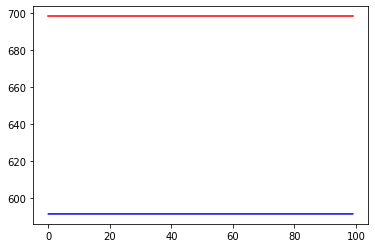

In [ ]:
val_mse = history.history['val_mse']  ##The history attribute is a dictionary which stores metrics from each epoch
mse = history.history['mse']
import matplotlib.pyplot as plt
plt.plot(val_mse, color = 'red')  ## Plot the validation error
plt.plot(mse, color = 'blue') ## Plot training error
## You can see that the validation error saturate after 25 epochs or so. We don't need to train till 100 epochs (Early stopping)

In [ ]:
## Now evaluate the model on test data
## But first normalize test data using same normalization that was used for training data

X_test_normd = (X_test - X_train_mean)/(10**-8 + X_train_std)
model.evaluate(X_test_normd, y_test)


## Mean squared error is 10 (Means our prediction for median house price is off by $3k (square root of 10))

5/5 [==============================] - 0s 2ms/step - loss: 568.5519 - mse: 568.5519


[568.5518798828125, 568.5518798828125]

## Some things to explore
- Try to see training performance if you don't normalize the inputs
- Try to tune the hyperparameters (number of layers, number of neurons, learning_rate of optimizer, batch_size etc) to see if you can converge faster or get a lower mse

## Assignment
- Try to use these techniques to model power plant data 
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant